In [1]:
###############
### Imports ###
###############

import pandas as pd
import numpy as np
import seaborn as sns
sns.set()

In [8]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'geyser',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'taxis',
 'tips',
 'titanic']

In [13]:
crashes = sns.load_dataset('car_crashes')
crashes.sample(10)

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
38,18.2,9.100,5.642,17.472,16.016,905.99,153.86,PA
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK
34,23.9,5.497,10.038,23.661,20.554,688.75,109.72,ND
21,8.2,1.886,2.870,7.134,6.560,1011.14,135.63,MA
17,21.4,4.066,4.922,16.692,16.264,872.51,137.13,KY
15,15.7,2.669,3.925,15.229,13.659,649.06,114.47,IA
8,5.9,2.006,1.593,5.900,5.900,1273.89,136.05,DC
43,19.4,7.760,7.372,17.654,16.878,1004.75,156.83,TX
36,19.9,6.368,5.771,18.308,18.706,881.51,178.86,OK
41,19.4,6.014,6.402,19.012,16.684,669.31,96.87,SD


In [22]:
### Some info and descriptive stats
print(crashes.info())
print(crashes.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   total           51 non-null     float64
 1   speeding        51 non-null     float64
 2   alcohol         51 non-null     float64
 3   not_distracted  51 non-null     float64
 4   no_previous     51 non-null     float64
 5   ins_premium     51 non-null     float64
 6   ins_losses      51 non-null     float64
 7   abbrev          51 non-null     object 
dtypes: float64(7), object(1)
memory usage: 3.3+ KB
None
           total   speeding    alcohol  not_distracted  no_previous  \
count  51.000000  51.000000  51.000000       51.000000    51.000000   
mean   15.790196   4.998196   4.886784       13.573176    14.004882   
std     4.122002   2.017747   1.729133        4.508977     3.764672   
min     5.900000   1.792000   1.593000        1.760000     5.900000   
25%    12.750000   3.766500   3.8940

In [14]:
#return rows were alcohol was involved in at least a third of the total cases
crashes.loc[crashes.alcohol/crashes.total > 0.33]

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
6,10.8,4.968,3.888,9.396,8.856,1068.73,167.02,CT
11,17.5,9.450,7.175,14.350,15.225,861.18,120.92,HI
13,12.8,4.608,4.352,12.032,12.288,803.11,139.15,IL
21,8.2,1.886,2.870,7.134,6.560,1011.14,135.63,MA
25,16.1,6.923,5.474,14.812,13.524,790.32,144.45,MO
26,21.4,8.346,9.416,17.976,18.190,816.21,85.15,MT
27,14.9,1.937,5.215,13.857,13.410,732.28,114.82,NE
34,23.9,5.497,10.038,23.661,20.554,688.75,109.72,ND
35,14.1,3.948,4.794,13.959,11.562,697.73,133.52,OH
39,11.1,3.774,4.218,10.212,8.769,1148.99,148.58,RI


In [17]:
#return rows were alcohol was involved in at least a third of the total cases and less than 10 were not distracted
#Note tht each condition is wrapped in parenthesis
crashes.loc[((crashes.alcohol/crashes.total > 0.33) & (crashes.not_distracted < 10))]

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
6,10.8,4.968,3.888,9.396,8.856,1068.73,167.02,CT
21,8.2,1.886,2.870,7.134,6.560,1011.14,135.63,MA


In [18]:
#call the row no_previous as a series
crashes.no_previous

0     15.040
1     17.014
2     17.856
3     21.280
4     10.680
5     12.920
6      8.856
7     16.038
8      5.900
9     16.826
10    14.508
11    15.225
12    14.994
13    12.288
14    13.775
15    13.659
16    15.130
17    16.264
18    20.090
19    12.684
20    12.375
21     6.560
22    10.857
23     8.448
24    17.600
25    13.524
26    18.190
27    13.410
28    14.553
29     9.628
30     8.736
31    18.032
32     9.840
33    13.608
34    20.554
35    11.562
36    18.706
37    11.520
38    16.016
39     8.769
40    19.359
41    16.684
42    15.795
43    16.878
44    10.848
45    12.920
46    11.176
47     9.116
48    20.706
49    11.592
50    15.660
Name: no_previous, dtype: float64

In [19]:
#call the row no_previous as a dataframe
crashes[['no_previous']]

,no_previous
0,15.040
1,17.014
2,17.856
3,21.280
4,10.680
5,12.920
6,8.856
7,16.038
8,5.900
9,16.826


In [39]:
#add column called 'alco_percent' and 'alco_percent_over_third'
crashes['alco_percent'] = crashes.alcohol/crashes.total
crashes['alco_percent_over_third'] = crashes['alco_percent'] > 0.33
crashes.sample(10)

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev,alco_percent,alco_percent_over_third
46,12.7,2.413,3.429,11.049,11.176,768.95,153.72,VA,0.27,False
48,23.8,8.092,6.664,23.086,20.706,992.61,152.56,WV,0.28,False
4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA,0.28,False
5,13.6,5.032,3.808,10.744,12.920,835.50,139.91,CO,0.28,False
26,21.4,8.346,9.416,17.976,18.190,816.21,85.15,MT,0.44,True
16,17.8,4.806,4.272,13.706,15.130,780.45,133.80,KS,0.24,False
7,16.2,6.156,4.860,14.094,16.038,1137.87,151.48,DE,0.30,False
36,19.9,6.368,5.771,18.308,18.706,881.51,178.86,OK,0.29,False
6,10.8,4.968,3.888,9.396,8.856,1068.73,167.02,CT,0.36,True
31,18.4,3.496,4.968,12.328,18.032,869.85,120.75,NM,0.27,False


In [25]:
## Return States where alco_percent_over_third is true
crashes.loc[crashes.alco_percent_over_third == True]['abbrev']

6     CT
11    HI
13    IL
21    MA
25    MO
26    MT
27    NE
34    ND
35    OH
39    RI
40    SC
43    TX
Name: abbrev, dtype: object

<AxesSubplot:xlabel='total', ylabel='alcohol'>

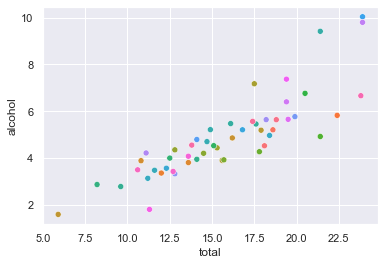

In [29]:
## Plot total vs alcohol with abbrev as hue
sns.scatterplot(data=crashes,x='total',y='alcohol',hue='abbrev', legend=False)

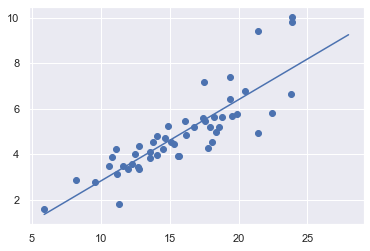

The slope is 0.35766152127551526 and the intercept is -0.7607612369249486


In [38]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

X = np.array(crashes.total)[:,np.newaxis]
y = np.array(crashes.alcohol)

model = LinearRegression()
model.fit(X,y)

Xfit = np.linspace(X.min(),X.max()+X.std(),200)
yfit = model.predict(Xfit[:,np.newaxis])

fig, ax = plt.subplots()
ax.scatter(X,y)
ax.plot(Xfit,yfit)
plt.show()

print(f'The slope is {model.coef_[0]} and the intercept is {model.intercept_}')